In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import pickle

In [49]:
big_mart_data = pd.read_csv('bigdatamart_Train.csv')


In [50]:
#check first 5 rows
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
big_mart_data.shape

(8523, 12)

In [52]:
#check information about data set
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [53]:
#check missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handiling missing values

In [54]:
big_mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [55]:
# meanan value of Item_Weight colmuns
big_mart_data['Item_Weight'].mean()

12.857645184136183

In [56]:
# fill missing values in item_weight column
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [57]:
big_mart_data['Outlet_Size'].fillna('Small',inplace=True)

In [58]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [59]:
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [60]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [61]:
# Discribe data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [62]:
sns.set()

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


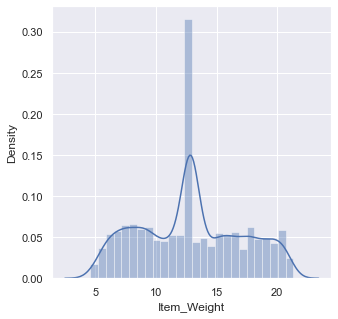

In [63]:
# item_weight distribution
plt.figure(figsize=(5,5))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


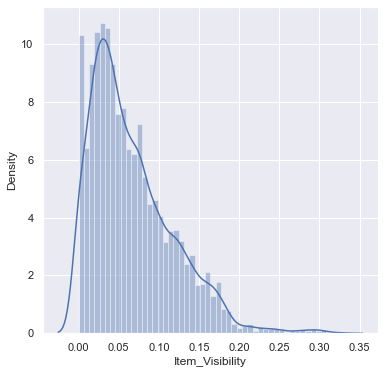

In [64]:
# item_visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


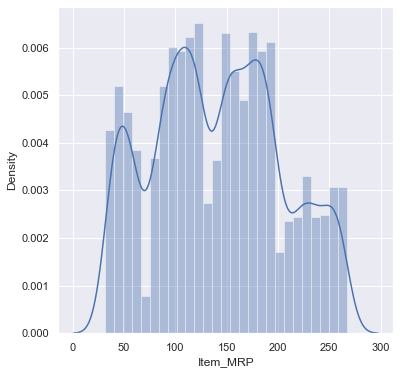

In [65]:
#iteam MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


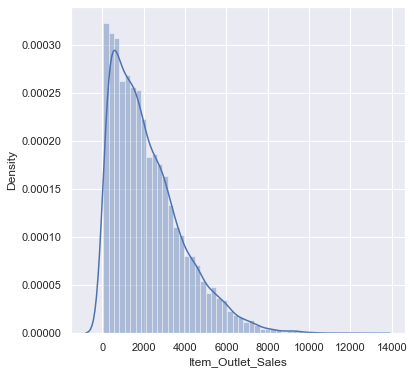

In [66]:
#iteam Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

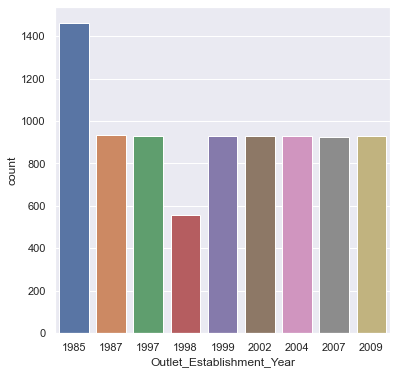

In [67]:
#iteam Outlet_Establishment_Year columns
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

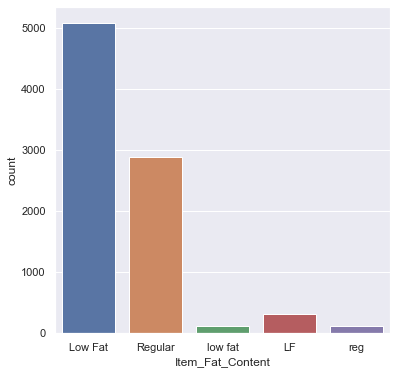

In [68]:
#iteam Outlet_Establishment_Year columns
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

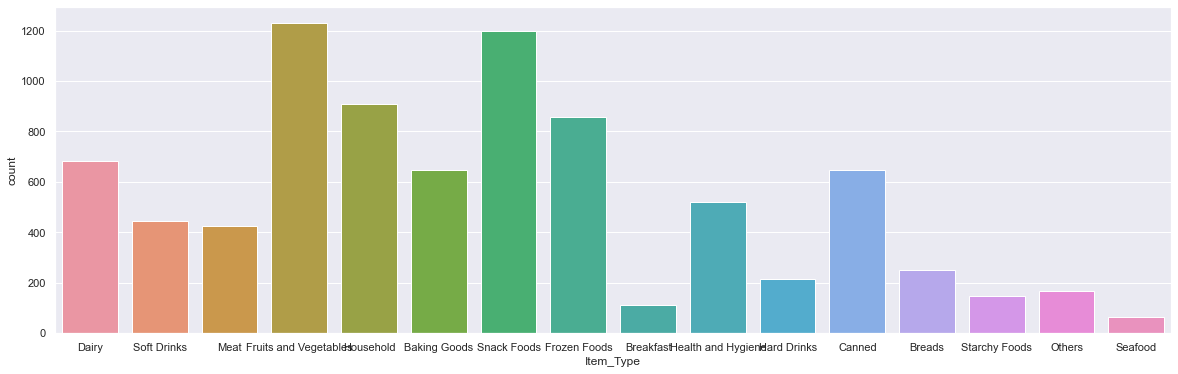

In [69]:
#iteam Item_Type columns
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

In [70]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [72]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [73]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [74]:
encoder = LabelEncoder()

In [75]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])


In [76]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting feature Targes

In [77]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [78]:
big_mart_data['Outlet_Size']

0       1
1       1
2       1
3       2
4       0
       ..
8518    0
8519    2
8520    2
8521    1
8522    2
Name: Outlet_Size, Length: 8523, dtype: int32

In [79]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [80]:
Y = pd.DataFrame(Y)
Y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [220]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [221]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Normalization

In [222]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_Xtrain = norm_fit.transform(X_train)
new_Xtest = norm_fit.transform(X_test)

 

In [223]:
X_train = new_Xtrain
X_test = new_Xtest

# Models

# XGBRegressor

In [224]:
from sklearn.metrics import classification_report,mean_squared_error
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [225]:
#prediction to traning_data
traning_data_prediction = regressor.predict(X_train)
#R sqared values
r2_train = metrics.r2_score(Y_train,traning_data_prediction)
print(f'R Squared values for train data= {r2_train}\n')


R Squared values for train data= 0.8639680373364909



In [226]:
#prediction to traning_data
test_data_prediction = regressor.predict(X_test)
#R sqared values
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(f'R Squared values for test data= {r2_test}')

R Squared values for test data= 0.5232981215538886


In [227]:
# check model score
model_score = regressor.score(X_test,Y_test)
print(f'score of model is : {model_score}')#print model score


score of model is : 0.5232981215538886


# Linear Regression Model

In [228]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [229]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [230]:
#prediction to traning_data
traning_data_prediction = regressor.predict(X_train)
#R sqared values
r2_train = metrics.r2_score(Y_train,traning_data_prediction)
print(f'R Squared values for train data= {r2_train}')

R Squared values for train data= 0.5071929167339232


In [231]:
#prediction to traning_data
test_data_prediction = regressor.predict(X_test)
#R sqared values
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(f'R Squared values for test data= {r2_test}')

R Squared values for test data= 0.48912987193626334


In [232]:
# check model score
model_score = regressor.score(X_test,Y_test)
print(f'score of model is : {model_score}')#print model score


score of model is : 0.48912987193626334


# Ridge Regression Model:


In [233]:
RR = Ridge(alpha=0.05,normalize=True)
RR.fit(X_train,Y_train)

Ridge(alpha=0.05, normalize=True)

In [234]:
#prediction to traning_data
traning_data_prediction = RR.predict(X_train)
#R sqared values
r2_train = metrics.r2_score(Y_train,traning_data_prediction)
print(f'R Squared values for train data= {r2_train}')

R Squared values for train data= 0.5058931591193205


In [235]:
#prediction to traning_data
test_data_prediction = RR.predict(X_test)
#R sqared values
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(f'R Squared values for test data= {r2_test}')

R Squared values for test data= 0.48789117654161485


In [236]:
# check model score
model_score = RR.score(X_test,Y_test)
print(f'score of model is : {model_score}')#print model score


score of model is : 0.48789117654161485


# Decision Tree Model

In [237]:
from sklearn.tree import DecisionTreeRegressor

In [238]:
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [239]:
#prediction to traning_data
traning_data_prediction = DT.predict(X_train)
#R sqared values
r2_train = metrics.r2_score(Y_train,traning_data_prediction)
print(f'R Squared values for train data= {r2_train}')

R Squared values for train data= 0.6184640137917784


In [240]:
#prediction to traning_data
test_data_prediction = DT.predict(X_test)
#R sqared values
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(f'R Squared values for test data= {r2_test}')

R Squared values for test data= 0.5745515188081575


In [241]:
# check model score
model_score = DT.score(X_test,Y_test)
print(f'score of model is : {model_score}')#print model score

score of model is : 0.5745515188081575


# Random Forest Model

In [242]:
from sklearn.ensemble import RandomForestRegressor

In [243]:
RF = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
RF.fit(X_train,Y_train)

<ipython-input-243-40c031cc6326>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,Y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4)

In [244]:
#prediction to traning_data
traning_data_prediction = RF.predict(X_train)
#R sqared values
r2_train = metrics.r2_score(Y_train,traning_data_prediction)
print(f'R Squared values for train data= {r2_train}')

R Squared values for train data= 0.606647479718694


In [245]:
#prediction to traning_data
test_data_prediction = RF.predict(X_test)
#R sqared values
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print(f'R Squared values for test data= {r2_test}')

R Squared values for test data= 0.5824468442457396


In [246]:
# check model score
model_score = RF.score(X_test,Y_test)
print(f'score of model is : {model_score}')#print model score

score of model is : 0.5824468442457396


# Save best Model

In [252]:
#save model Random Forest Model
file = 'Big Mart Sales'
#save file
save = pickle.dump(RF,open(file,'wb'))